Today we will talk about optimization.
We will focus on unconstrained optimization in one dimension.

To fix ideas we will deal with minimization (unless stated otherwise):

$$\min_x f(x)$$


In [1]:
using Pkg
Pkg.activate("..") ## because we have environment files in the parent directory
Pkg.instantiate() ## to download all missing packages


  Activating project at `c:\Users\piotr\Dropbox\WNE\QuantEcon_all\QEcon2023\Code`

In [2]:
# load some packages we will need today
using Plots, Calculus, Optim, ForwardDiff

### Grid search
Just evaluate the function on some grid and pick the point that has the largest/the smallest value.

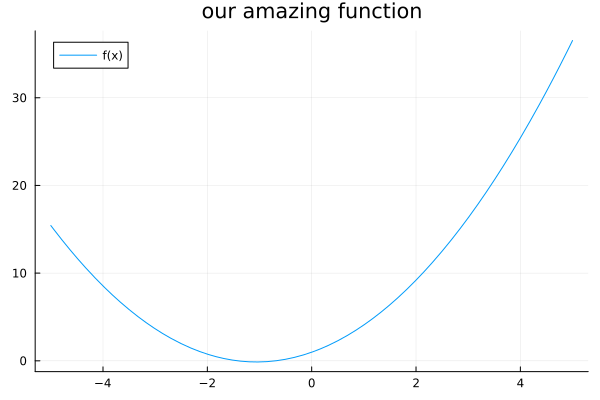

In [3]:
# test function
f(x) = x.^2.0 .+ 2.11 .* x .+ 0.98  #notice the dots! 

# plot it to see what happens
plot(f, -5, 5, label="f(x)", legend=:topleft, title = "our amazing function")

In [4]:
grid_for_evaluation = -5:0.75:5 # this is the grid we will use to evaluate the function
typeof(grid_for_evaluation) # what is the type of this thing?

StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}

In [5]:
vector_of_points = collect(grid_for_evaluation) # convert the range to a vector -- not needed for much, but you might want to extract the point

14-element Vector{Float64}:
 -5.0
 -4.25
 -3.5
 -2.75
 -2.0
 -1.25
 -0.5
  0.25
  1.0
  1.75
  2.5
  3.25
  4.0
  4.75

In [6]:
# evaluate

function_values = f(grid_for_evaluation) # evaluate the function on the grid

14-element Vector{Float64}:
 15.43
 10.075
  5.845000000000001
  2.7400000000000007
  0.7599999999999993
 -0.09499999999999975
  0.17500000000000004
  1.5699999999999998
  4.09
  7.734999999999999
 12.505
 18.400000000000002
 25.419999999999998
 33.565

In [7]:
val_min, arg_min_ind = findmin(function_values)
arg_min = grid_for_evaluation[arg_min_ind] 


# more compactly
arg_min_2 = argmin(f, grid_for_evaluation) 

println("The minimum is at (?) $arg_min with value $val_min")

The minimum is at (?) -1.25 with value -0.09499999999999975


### Bracketing methods
As you can see, the above is not super precise. We can add more and more grid points, but there are better methods. If we know an optimum lies in some interval, we can use bracketing methods.

In [13]:
function simple_bracket(f,a,b,c; ε=10e-6, maxcounter = 100, verbose = false)
    # this algorithm is from Judd (1988), page 95

    counter = 1
    if ((f(a) > f(b)) && (f(c) > f(b))) && (a < b < c)
        

        guesses = []
        # try with a new point d 
        while c - a > ε
            if counter > maxcounter
                println("Maximum number of iterations ($maxcounter) reached")
                break
            end

            if (b - a < c - b)
                d = (b+c)/2
            else
                d = (a+b)/2
            end
                
            guesses = push!(guesses,d)
            
            if verbose
                println("Iteration = $counter")    
                println("Point d = [$d]")    
                println("Bracket = [$a $c]")    
                println("")
            end


            counter += 1
            if ((d < b) && (f(d) > f(b)))
                a, b, c  = d, b, c
            elseif ((d < b) && (f(d) < f(b)))
                a, b, c  = a, d, b
            elseif ((d > b) && (f(d) < f(b)))
                a, b, c  = b, d, c
            elseif ((d > b) && (f(d) > f(b)))
                a, b, c  = a, b, d
            end

            
        
        end
            println("Minimum = $(f(c)) at $c")
            return (argmin = c, val = f(c), points = guesses, iteration = counter)

        
        
    else 
        println("The condition a < b < c and f(a), f(c) > f(b) is not satisfied. Try with different values.")
    end
end

simple_bracket (generic function with 1 method)

In [14]:
outs = simple_bracket(f,-4,0,2;verbose=true)

Iteration = 1
Point d = [-2.0]
Bracket = [-4 2]

Iteration = 2
Point d = [-3.0]
Bracket = [-4 0]

Iteration = 3
Point d = [-1.0]
Bracket = [-3.0 0]

Iteration = 4
Point d = [-1.5]
Bracket = [-2.0 0]

Iteration = 5
Point d = [-0.5]
Bracket = [-1.5 0]

Iteration = 6
Point d = [-1.25]
Bracket = [-1.5 -0.5]

Iteration = 7
Point d = [-0.75]
Bracket = [-1.25 -0.5]

Iteration = 8
Point d = [-1.125]
Bracket = [-1.25 -0.75]

Iteration = 9
Point d = [-0.875]
Bracket = [-1.125 -0.75]

Iteration = 10
Point d = [-1.0625]
Bracket = [-1.125 -0.875]

Iteration = 11
Point d = [-1.09375]
Bracket = [-1.125 -1.0]

Iteration = 12
Point d = [-1.03125]
Bracket = [-1.09375 -1.0]

Iteration = 13
Point d = [-1.078125]


Bracket = [-1.09375 -1.03125]

Iteration = 14
Point d = [-1.046875]
Bracket = [-1.078125 -1.03125]

Iteration = 15
Point d = [-1.0703125]
Bracket = [-1.078125 -1.046875]

Iteration = 16
Point d = [-1.0546875]
Bracket = [-1.0703125 -1.046875]

Iteration = 17
Point d = [-1.05859375]
Bracket = [-1.0625 -1.046875]

Iteration = 18
Point d = [-1.05078125]
Bracket = [-1.05859375 -1.046875]

Iteration = 19
Point d = [-1.056640625]
Bracket = [-1.05859375 -1.05078125]

Iteration = 20
Point d = [-1.052734375]
Bracket = [-1.056640625 -1.05078125]

Iteration = 21
Point d = [-1.0556640625]
Bracket = [-1.056640625 -1.052734375]

Iteration = 22
Point d = [-1.0537109375]
Bracket = [-1.0556640625 -1.052734375]

Iteration = 23
Point d = [-1.05517578125]
Bracket = [-1.0556640625 -1.0537109375]

Iteration = 24
Point d = [-1.055419921875]
Bracket = [-1.0556640625 -1.0546875]

Iteration = 25
Point d = [-1.054931640625]
Bracket = [-1.055419921875 -1.0546875]

Iteration = 26
Point d = [-1.0550537109375]
Bracke


Point d = [-1.054962158203125]
Bracket = [-1.055023193359375 -1.054931640625]

Iteration = 31
Point d = [-1.0550079345703125]
Bracket = [-1.055023193359375 -1.054962158203125]

Iteration = 32
Point d = [-1.0549774169921875]
Bracket = [-1.0550079345703125 -1.054962158203125]

Iteration = 33
Point d = [-1.0550003051757812]
Bracket = [-1.0550079345703125 -1.0549774169921875]

Iteration = 34
Point d = [-1.0550041198730469]
Bracket = [-1.0550079345703125 -1.05499267578125]

Iteration = 35
Point d = [-1.0549964904785156]
Bracket = [-1.0550041198730469 -1.05499267578125]

Minimum = -0.13302499998768313 at -1.0549964904785156


(argmin = -1.0549964904785156, val = -0.13302499998768313, points = Any[-2.0, -3.0, -1.0, -1.5, -0.5, -1.25, -0.75, -1.125, -0.875, -1.0625  …  -1.0550537109375, -1.05511474609375, -1.05499267578125, -1.055023193359375, -1.054962158203125, -1.0550079345703125, -1.0549774169921875, -1.0550003051757812, -1.0550041198730469, -1.0549964904785156], iteration = 36)

┌ Info: Saved animation to C:\Users\piotr\AppData\Local\Temp\jl_jSt4RSBIfM.gif
└ @ Plots C:\Users\piotr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\piotr\\AppData\\Local\\Temp\\jl_jSt4RSBIfM.gif")
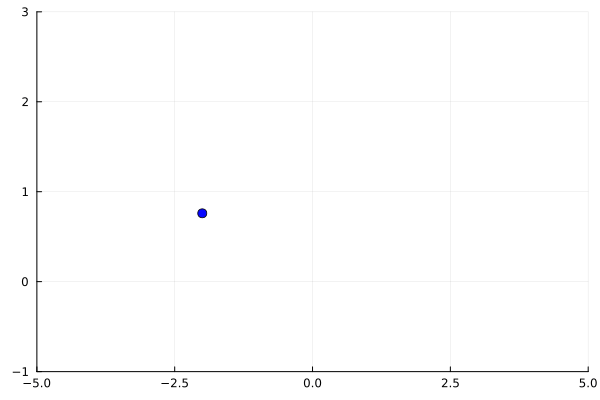

In [21]:
myscatter = scatter(;xlim = [-5,5],ylim = [-1,3])
animation = @animate for (ind,point) in enumerate(outs.points)
    scatter!(myscatter,[point], [f(point)], alpha = 1 - ind/length(outs.points),ms = 5,color = :blue,lab="")
end

gif(animation,fps = 10)

In [ ]:
function newton(f,f′,f′′,x0; ε=10e-6, δ=10e-6, maxcounter = 100, verbose = false)
    # this algorithm is from Judd (1988), page 98
    x_old = x0
    x_new = 2*abs(x0) + 1
    counter = 1
    guesses = []

    while ((abs(f′(x_old)) > δ) || (abs(x_new-x_old) > ε * (1+abs(x_old))))
        guesses = push!(guesses,x_old)
        if verbose
            println("Iteration = $counter")    
            println("Point = $x_old")    
            println("Value = $(f(x_old))")  
            println("Derivative = $(f′(x_old))")  
            println("")
        end


        if counter > maxcounter
            println("Maximum number of iterations ($maxcounter) reached")
            break
        end

        counter += 1
        x_old = x_new
        x_new = x_old - f′(x_old)/f′′(x_old)
        
        
    end

    return (argmin = x_new, val = f(x_new), derivative  = f′(x_new), points = guesses, iteration = counter)
    end

In [ ]:
#redefine function
f(x) = x.^2.0 .+ 2.11 .* x .+ 0.98  #notice the dots! 
f′(x) = 2.0 .* x .+ 2.11
f′′(x) = 2.0 

In [ ]:
newton(f,f′,f′′, 0.0,verbose=true)

In [ ]:

# use Calculus.jl package to get them - finite differences
# finite differences use the fact that the derivative is the limit of the difference quotient
# f′(x) = lim_{h->0} (f(x+h) - f(x))/h
# so we can approximate it with a small h

f′(x) = derivative(f,x)
f′′(x) = second_derivative(f,x)

plot(f, -5, 5, label="f(x)", legend=:topleft, title = "our amazing function")
plot!(f′, -5, 5, label="f′(x)", legend=:topleft)
plot!(f′′, -5, 5, label="f′′(x)", legend=:topleft)


In [ ]:
newton(f,f′,f′′, 0.0,verbose=true)

In [ ]:
# automatic differentiation - it is exact
# ForwardDiff.jl package
ForwardDiff.derivative(f,1) # first derivative at 1
f′_AD(x) = ForwardDiff.derivative(f,x) # function that returns the derivative of f at x - note it takes f defined earlier



In [ ]:
function newton_AD(f,x0; ε=10e-6, δ=10e-6, maxcounter = 100, verbose = false)
    # this algorithm is from Judd (1988), page 98
    f′(x)  = ForwardDiff.derivative(f,x)
    f′′(x) = ForwardDiff.derivative(f′,x)

    x_old = x0
    x_new = 2*abs(x0) + 1
    counter = 1
    guesses = []

    while ((abs(f′(x_old)) > δ) || (abs(x_new-x_old) > ε * (1+abs(x_old))))
        guesses = push!(guesses,x_old)
        if verbose
            println("Iteration = $counter")    
            println("Point = $x_old")    
            println("Value = $(f(x_old))")  
            println("Derivative = $(f′(x_old))")  
            println("")
        end


        if counter > maxcounter
            println("Maximum number of iterations ($maxcounter) reached")
            break
        end

        counter += 1
        x_old = x_new
        x_new = x_old - f′(x_old)/f′′(x_old)
        
        
    end

    return (argmin = x_new, val = f(x_new), derivative  = f′(x_new), points = guesses, iteration = counter)
    end

In [ ]:
newton_AD(f, 0.0,verbose=true)